In [1]:
# importando as bibliotecas e ferramentas necessárias

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats


In [2]:
# importando a base de dados da Olist

clientes = pd.read_csv("olist_customers_dataset.csv")
itens_pedidos = pd.read_csv("olist_order_items_dataset.csv")
pagamentos = pd.read_csv("olist_order_payments_dataset.csv")
pedidos = pd.read_csv("olist_orders_dataset.csv")
produtos = pd.read_csv("olist_products_dataset.csv")

In [3]:
# realizando análise da base de dados clientes

print("A base de dados clientes possui", clientes.shape[0], "linhas e", clientes.shape[1], "colunas.")
clientes.head()


A base de dados clientes possui 99441 linhas e 5 colunas.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Estão presentes 27 estados diferentes nessa base dos clientes. Os TOP 10 estados são:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

Estão presentes 4119 cidades diferentes nessa base dos clientes. As TOP 10 cidades são:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

As TOP 10 cidades cobrem 35.2 por cento de todos os pedidos.


Text(0.5, 0, 'Cidades')

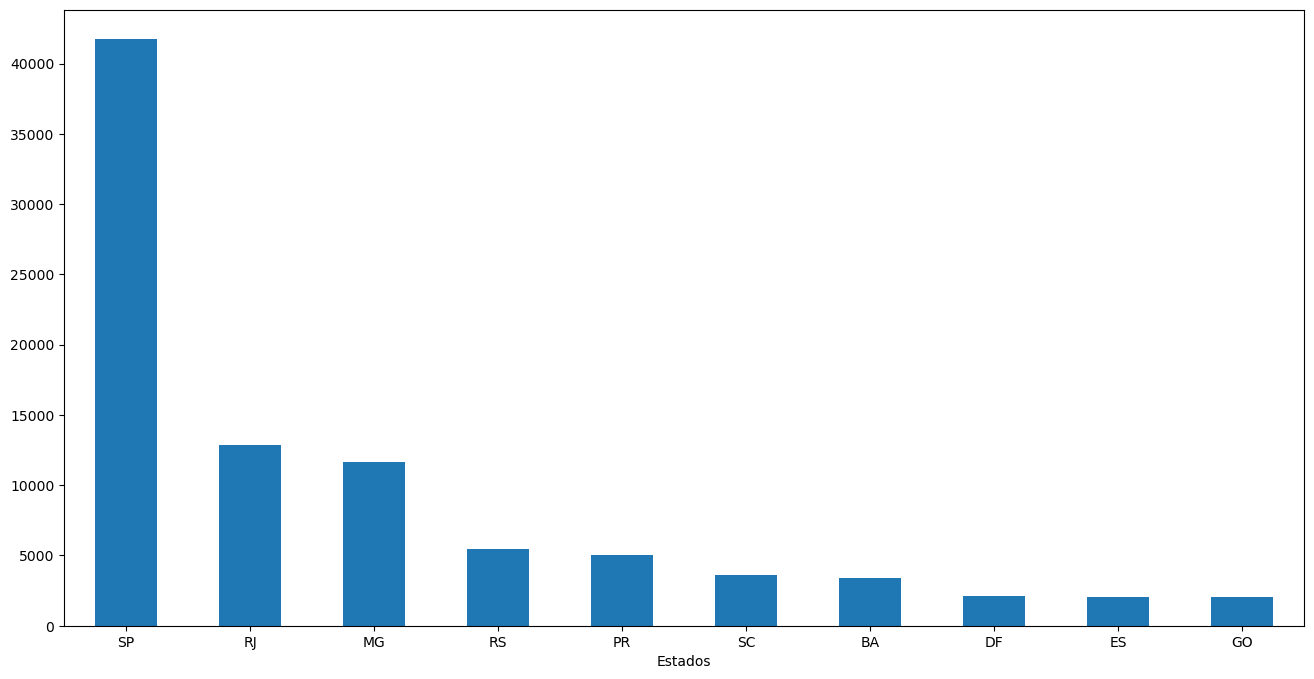

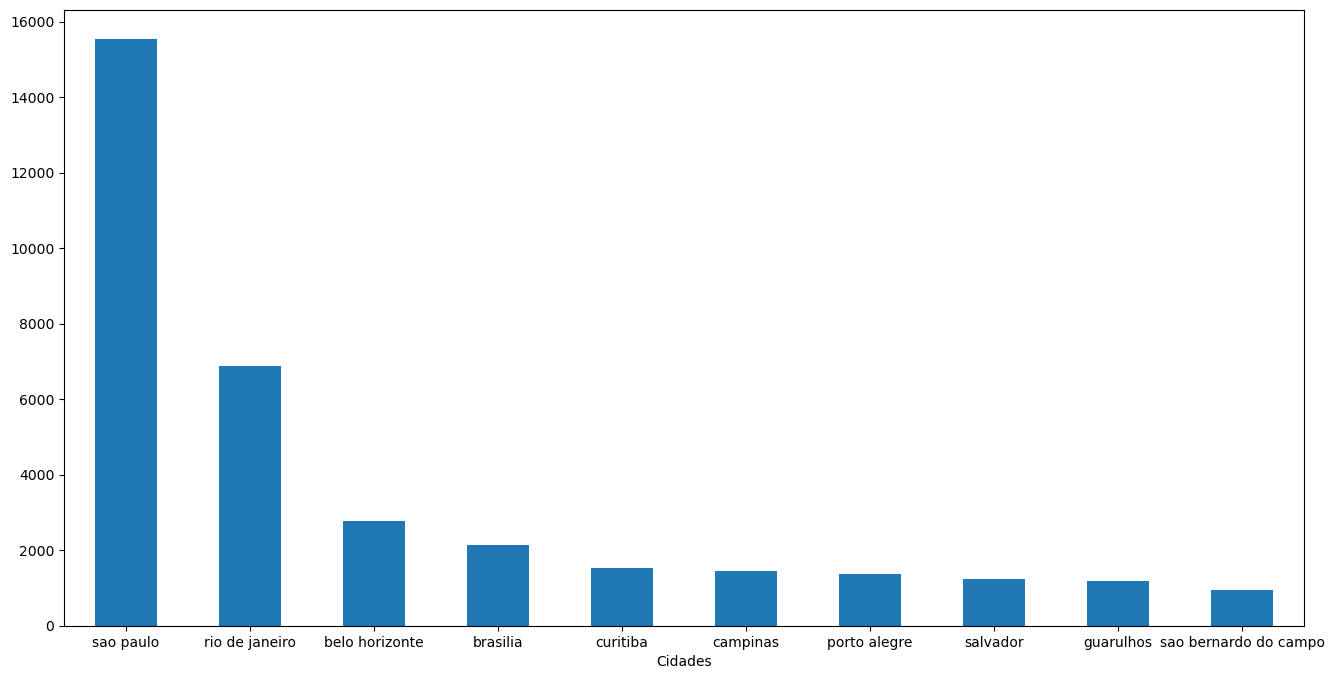

In [4]:
# Verificando quais estados realizam mais pedidos

estados = clientes["customer_state"].nunique()
c1 = clientes.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
print("Estão presentes",estados,"estados diferentes nessa base dos clientes. Os TOP 10 estados são:")
c2 = c1.head(10)
print(c2)
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)
plt.xlabel('Estados')
print()
# Verificando quais cidades realizam mais pedidos
cidades = clientes["customer_city"].nunique()
c3 = clientes.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("Estão presentes",cidades,"cidades diferentes nessa base dos clientes. As TOP 10 cidades são:")
c4 = c3.head(10)
print(c4)
print("\nAs TOP 10 cidades cobrem", round(c4.sum()/clientes.shape[0]*100,1),"por cento de todos os pedidos.")
plt.figure(figsize=(16,8))
c4.plot(kind="bar",rot=0)
plt.xlabel('Cidades')

In [5]:
# Verificando quais bairros realizam mais pedidos

ceps = clientes.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False)
print("Os produtos foram vendidos mais frequentemente,",ceps.iloc[0],"vezes para o cep de início", ceps.index[0],
      "referente ao bairro Recreio do bandeirantes no Rio de Janeiro.", "O segundo e terceiro cep com mais pedidos são"
      ,ceps.index[1],"e",ceps.index[2],"com ",ceps.iloc[1],"e",ceps.iloc[2],"pedidos. Sendo esses ceps referentes ao bairro de Icaraí em Niterói RJ e Barra da Tijuca Rio de Janeiro" )


Os produtos foram vendidos mais frequentemente, 142 vezes para o cep de início 22790 referente ao bairro Recreio do bandeirantes no Rio de Janeiro. O segundo e terceiro cep com mais pedidos são 24220 e 22793 com  124 e 121 pedidos. Sendo esses ceps referentes ao bairro de Icaraí em Niterói RJ e Barra da Tijuca Rio de Janeiro


In [6]:
# realizando análise da base de dados pagamentos

pagamentos["payment_value"].describe()



count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

85.1120655427034


count    98691.000000
mean       117.828177
std         85.112066
min          0.000000
25%         55.000000
50%         95.100000
75%        158.070000
max        437.590000
Name: payment_value, dtype: float64

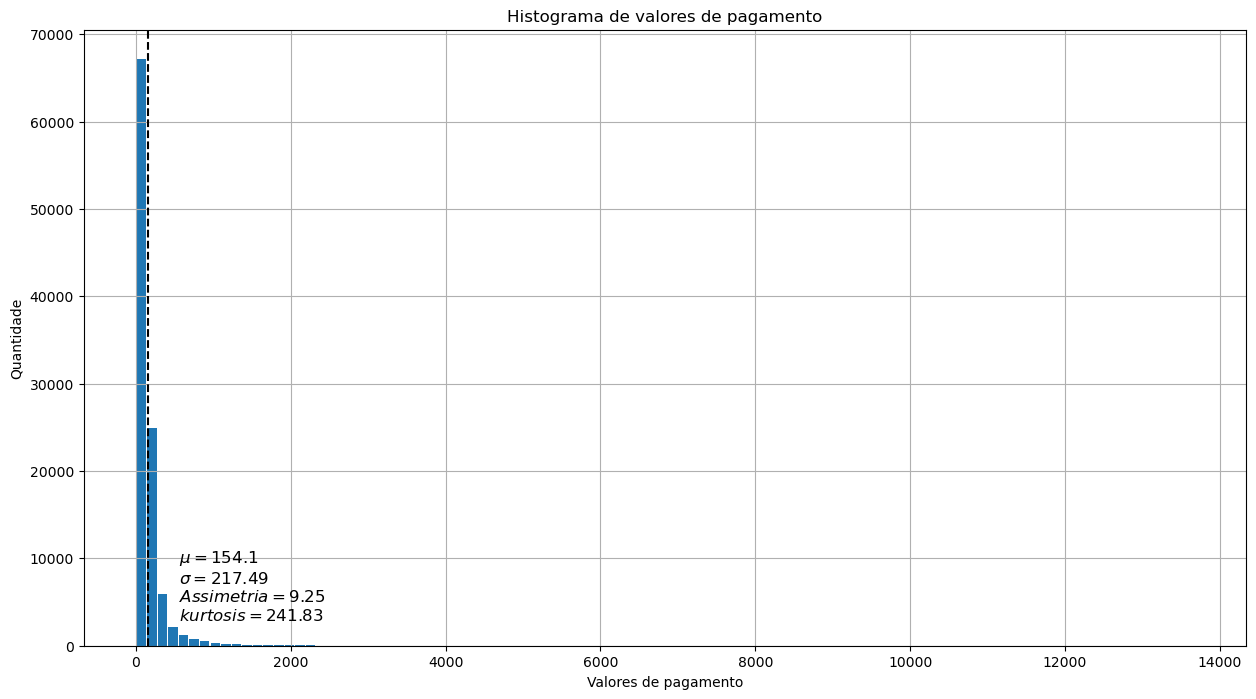

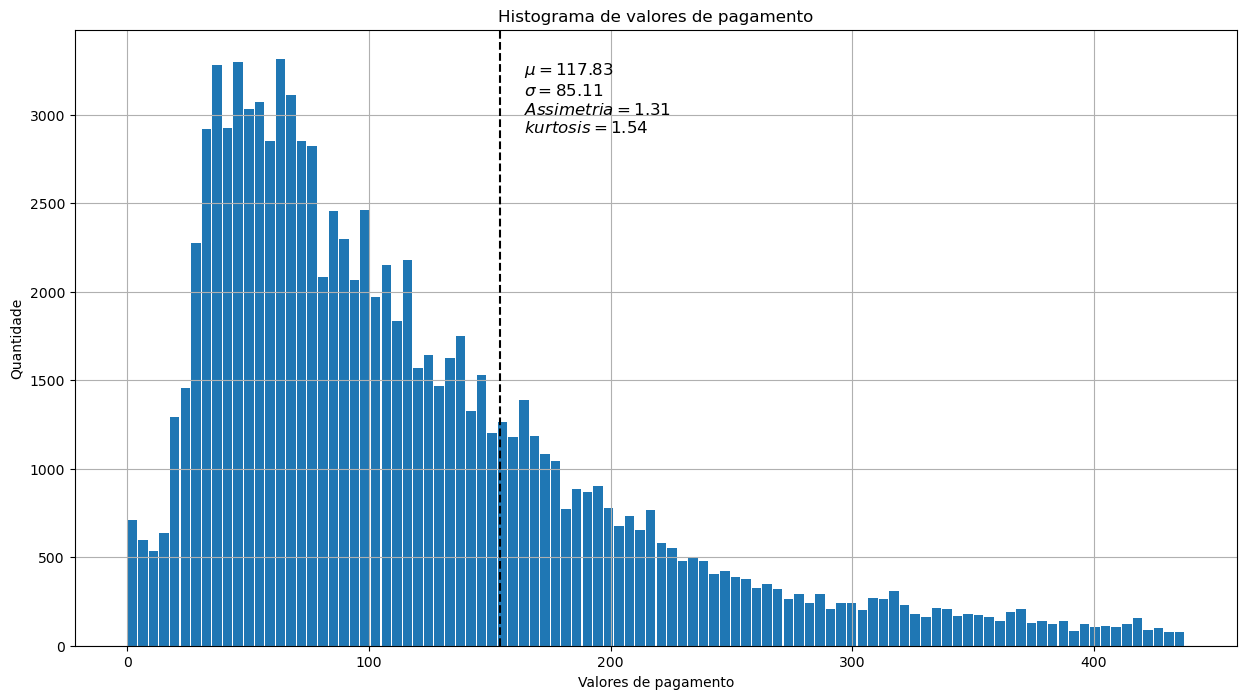

In [7]:
#criando um histograma dos valores de pagamento

media = pagamentos["payment_value"].mean()
std = pagamentos["payment_value"].std()
skew = pagamentos["payment_value"].skew()
kurt = pagamentos["payment_value"].kurtosis()

text1 = '$\mu=$' + str(round(media,2))
text2 = '$\sigma=$' +str(round(std,2))
text3 = '$Assimetria=$' + str(round(skew,2))
text4 = '$kurtosis=$' + str(round(kurt,2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4

pagamentos.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)
plt.axvline(media, color='k', linestyle='--')
plt.text(media+400, 2900, text, fontsize=12)
plt.xlabel("Valores de pagamento")
plt.ylabel("Quantidade")
plt.title("Histograma de valores de pagamento")

# eliminando os 5% dos dados com valores mais altos para eliminar os outliers
q95 = pagamentos["payment_value"].quantile(.95)
pagamentos_q95 = pagamentos[pagamentos["payment_value"]<q95]

media2 = pagamentos_q95["payment_value"].mean()
std2 = pagamentos_q95["payment_value"].std()
skew2 = pagamentos_q95["payment_value"].skew()
kurt2 = pagamentos_q95["payment_value"].kurtosis()

text5 = '$\mu=$' + str(round(media2,2))
text6 = '$\sigma=$' +str(round(std2,2))
text7 = '$Assimetria=$' + str(round(skew2,2))
text8 = '$kurtosis=$' + str(round(kurt2,2))
text9 = text5 + "\n" + text6 + "\n" + text7 + "\n" + text8

pagamentos_q95.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)
plt.axvline(media, color='k', linestyle='--')
plt.text(media+10, 2900, text9, fontsize=12)
plt.xlabel("Valores de pagamento")
plt.ylabel("Quantidade")
plt.title("Histograma de valores de pagamento")
std2 = pagamentos_q95["payment_value"].std()
print(std2)
pagamentos_q95["payment_value"].describe()

Text(0, 0.5, '')

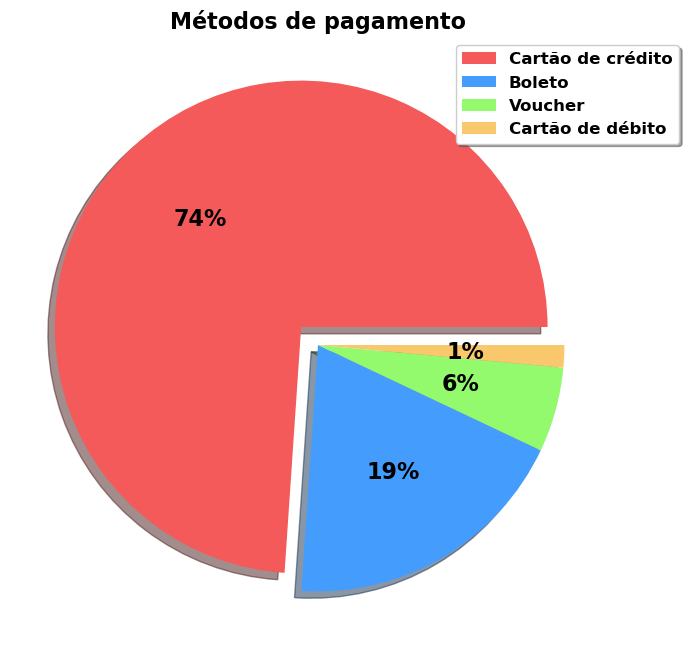

In [8]:
#Criando um gráfico de pizza com os métodos de pagamento

fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Cartão de crédito", "Boleto", "Voucher", "Cartão de débito"]

p = pagamentos["payment_type"][pagamentos["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6,
       shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Métodos de pagamento", fontweight='bold', size=16)
plt.ylabel("")

In [9]:
# Analisando os pagamentos em relação a quantidade de parcelas 

print("Parcelas de pagamento")
print(pagamentos["payment_installments"].describe())
print()
print("Valores de pagamento")
print(pagamentos["payment_value"].describe())
print()
print("Métodos de pagamento")
print(pagamentos["payment_type"].value_counts())



Parcelas de pagamento
count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

Valores de pagamento
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

Métodos de pagamento
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


Text(0.5, 1.0, 'Histograma da quantidade de parcelas')

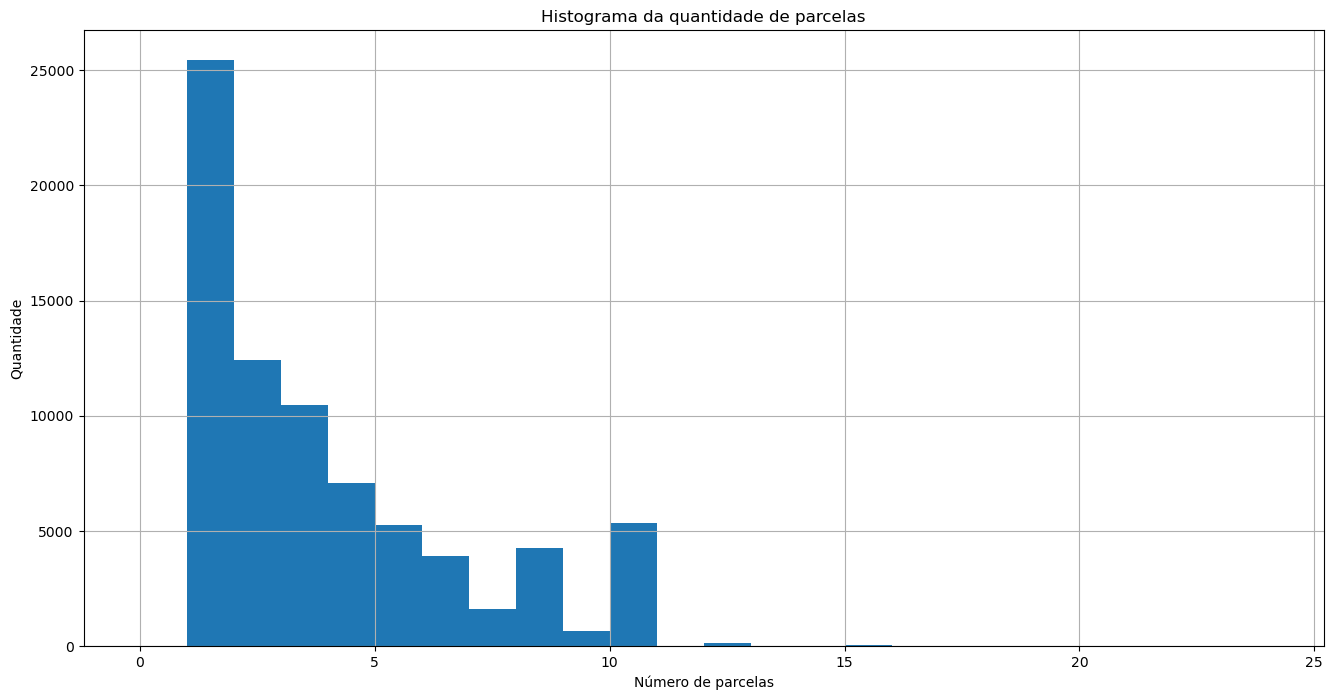

In [10]:
#histograma da quantidade de parcelas

credito = pagamentos[pagamentos["payment_type"]=="credit_card"]
fig, ax = plt.subplots(figsize=(16,8))
credito.hist(column = "payment_installments", bins = credito["payment_installments"].max(), ax=ax)
plt.xlabel("Número de parcelas")
plt.ylabel("Quantidade")
plt.title("Histograma da quantidade de parcelas")


In [11]:
# analisando a tabela pedidos 
print("A base de dados Pedidos possui", pedidos.shape[0], "linhas e", pedidos.shape[1], "colunas.")
pedidos.head()


A base de dados Pedidos possui 99441 linhas e 8 colunas.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Text(0, 0.5, 'Quantidade de pedidos')

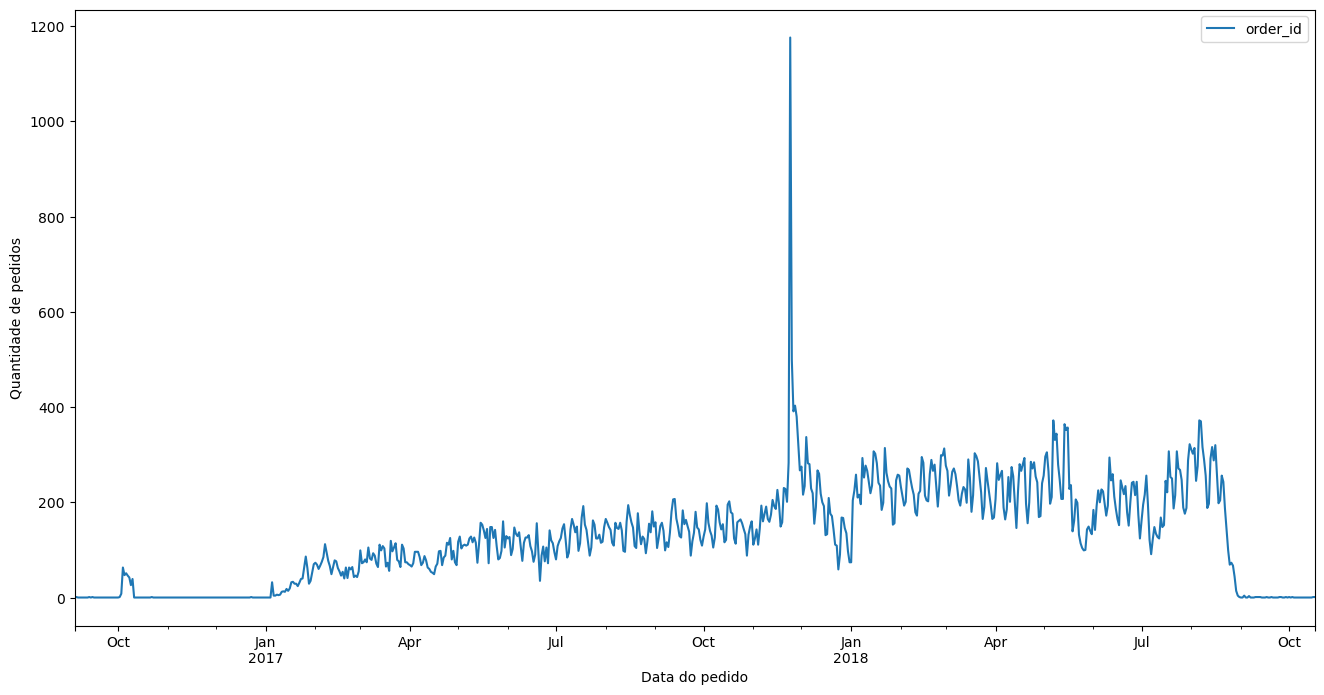

In [12]:
# alteração do formato da data e criação de gráfico de quantidade de pedidos pela data de compra

pedidos_2 = pedidos.copy()
pedidos_2["order_purchase_timestamp"] = pd.to_datetime(pedidos["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')

quantidade = pedidos_2.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
quantidade.plot(y = "order_id", use_index=True, ax=ax)
plt.xlabel('Data do pedido')
plt.ylabel('Quantidade de pedidos')

In [13]:
# Analisando a tabela produtos
print("A base de dados Itens_pedidos possui", itens_pedidos.shape[0], "linhas e", itens_pedidos.shape[1], "colunas.")
itens_pedidos.head()

A base de dados Itens_pedidos possui 112650 linhas e 7 colunas.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
# Adicionando a coluna com o nome das categorias dos produtos da base produtos na base itens_pedidos

itens_pedidos = itens_pedidos.merge(produtos[['product_id','product_category_name']], on='product_id', how='left')


In [16]:
print("A base de dados Itens_pedidos", itens_pedidos.shape[0], "linhas e", itens_pedidos.shape[1], "colunas.")
itens_pedidos.head()

A base de dados Itens_pedidos 112650 linhas e 8 colunas.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [17]:
# ecluindo os dados de produtos que não possuem categoria

itens_pedidos.dropna(inplace=True, subset=['product_category_name'])

#Verificando a quantidade de produtos e categorias diferentes

print("Número de produtos diferentes : ", itens_pedidos['product_id'].nunique())
print("Número de categorias de produtos diferentes : ", itens_pedidos['product_category_name'].nunique())


Número de produtos diferentes :  32341
Número de categorias de produtos diferentes :  73


In [18]:
# criando uma nova base somente com o id dos pedidos e com a categoria dos produtos

transacoes = itens_pedidos.groupby("order_id").product_category_name.unique()
transacoes.head()


order_id
00010242fe8c5a6d1ba2dd792cb16214            [cool_stuff]
00018f77f2f0320c557190d7a144bdd3              [pet_shop]
000229ec398224ef6ca0657da4fc703e      [moveis_decoracao]
00024acbcdf0a6daa1e931b038114c75            [perfumaria]
00042b26cf59d7ce69dfabb4e55b4fd9    [ferramentas_jardim]
Name: product_category_name, dtype: object

Text(0, 0.5, 'Quantidade de pedidos')

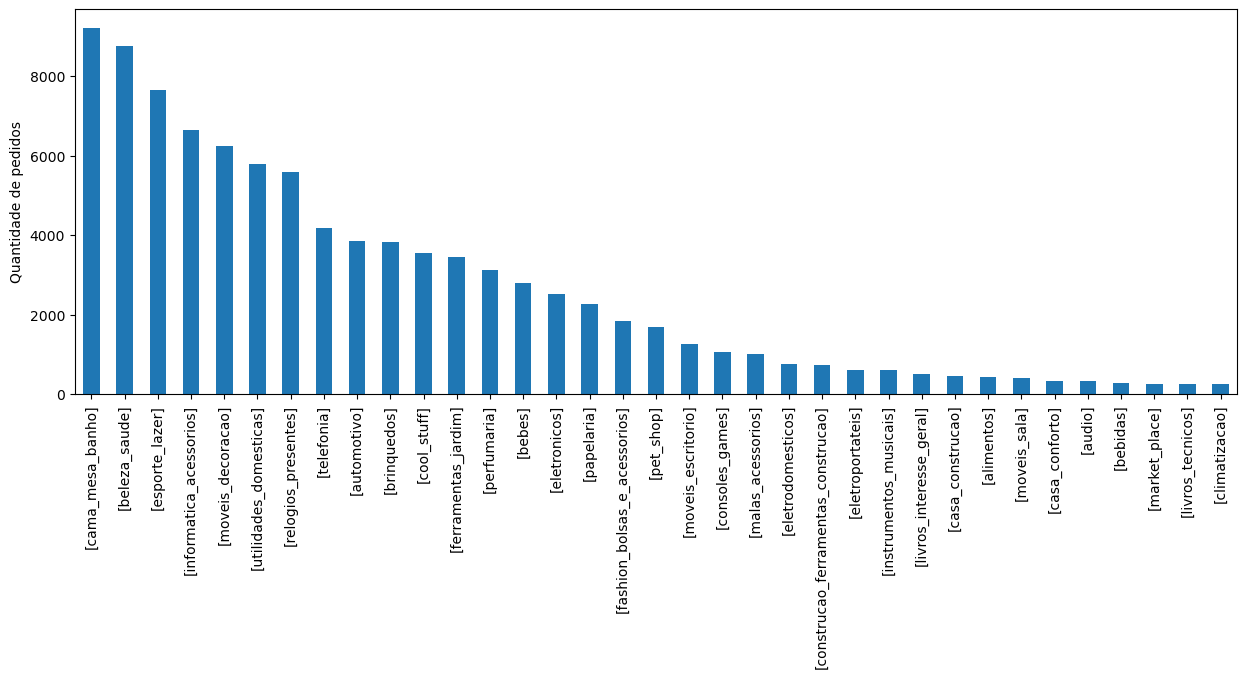

In [19]:
# criando um gráfico relacionando a quantidade de pedidos e as categorias de produtos

transacoes.value_counts()[:35].plot(kind='bar', figsize=(15,5))
plt.ylabel('Quantidade de pedidos')


In [20]:
# Convertendo a base de dados transacoes para uma lista 

#transacoes = transacoes.tolist()

# quantidade de transações
len(transacoes)


97277

In [21]:
# contando a quantidade de categorias de produto por transação

contagem = [len(transaction) for transaction in transacoes]
#verificando a medianda de quantidade dee categorias de produtos entre as transações
np.median(contagem)


1.0

In [22]:
#verificando a quantidade maxima de categorias de produtos diferentes entre as transações 
np.max(contagem)

3

In [23]:
# Criação da matriz one hot encoded em que cada coluna possui uma categoria de produto e cada linha representa uma transação
#Caso a categoria esteja presente na transação  é marcado como True e caso não esteja presente é marcado como False.
# A representação one-hot encoded torna mais fácil identificar padrões de associação entre categorias de itens em transações
# Os algoritmos de associação foram desenvolvidos para trabalhar com os dados nesse formato

from mlxtend.preprocessing import TransactionEncoder


encoder = TransactionEncoder()

encoder.fit(transacoes)

onehot = encoder.transform(transacoes)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

onehot.head()


,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Calculando o indice de suporte para cada categoria de produto, através da média das colunas

onehot.mean(axis=0)


agro_industria_e_comercio    0.001871
alimentos                    0.004626
alimentos_bebidas            0.002334
artes                        0.002077
artes_e_artesanato           0.000236
                               ...   
sinalizacao_e_seguranca      0.001439
tablets_impressao_imagem     0.000812
telefonia                    0.043165
telefonia_fixa               0.002231
utilidades_domesticas        0.060487
Length: 73, dtype: float64

In [25]:
# Verificando a quantidade de transações por quantidade de categorias de produtos

onehot.sum(axis=1).value_counts()


1    96550
2      712
3       15
dtype: int64

In [26]:
#  Inicio da aplicação do APRIORI na base onehot e com suporte mínimo de 1%

from mlxtend.frequent_patterns import apriori

frequent_item_sets = apriori(onehot, use_colnames = True, min_support = 0.01)
frequent_item_sets


,support,itemsets
0,0.040061,(automotivo)
1,0.029658,(bebes)
2,0.090833,(beleza_saude)
3,0.039948,(brinquedos)
4,0.096806,(cama_mesa_banho)
5,0.010917,(consoles_games)
6,0.037337,(cool_stuff)
7,0.026214,(eletronicos)
8,0.079361,(esporte_lazer)
9,0.019162,(fashion_bolsas_e_acessorios)


In [31]:
# aplicando novamente, porém diminuindo o valor do suporte minimo para adicionar os conjuntos com mais de uma categoria

frequent_item_sets = apriori(onehot, use_colnames = True, min_support = 0.00005, max_len = 2)
frequent_item_sets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.001871,(agro_industria_e_comercio)
1,0.004626,(alimentos)
2,0.002334,(alimentos_bebidas)
3,0.002077,(artes)
4,0.000236,(artes_e_artesanato)
...,...,...
103,0.000062,"(telefonia, informatica_acessorios)"
104,0.000051,"(papelaria, malas_acessorios)"
105,0.000072,"(moveis_sala, moveis_decoracao)"
106,0.000072,"(relogios_presentes, moveis_decoracao)"


In [28]:
# realizando a aplicação das regras de associação

from mlxtend.frequent_patterns import association_rules

associacoes = association_rules(frequent_item_sets, metric = 'support', min_threshold = 0.0001)

associacoes.head()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bebes),(brinquedos),0.029658,0.039948,0.000195,0.006586,0.164860,-0.000989,0.966417,-0.839243
1,(brinquedos),(bebes),0.039948,0.029658,0.000195,0.004889,0.164860,-0.000989,0.975110,-0.840677
2,(cama_mesa_banho),(bebes),0.096806,0.029658,0.000175,0.001805,0.060870,-0.002696,0.972097,-0.944697
3,(bebes),(cama_mesa_banho),0.029658,0.096806,0.000175,0.005893,0.060870,-0.002696,0.908548,-0.940829
4,(cool_stuff),(bebes),0.037337,0.029658,0.000206,0.005507,0.185673,-0.000902,0.975715,-0.820012


In [29]:
# realizando novamente a aplicação das regras de associação porém utilizando o indice de confiança como parametro


associacoes2 = association_rules(frequent_item_sets, metric = 'confidence', min_threshold = 0.01)
associacoes2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(artes),(moveis_decoracao),0.002077,0.066295,0.000051,0.024752,0.373367,-0.000086,0.957403,-0.627119
1,(audio),(relogios_presentes),0.003598,0.057814,0.000062,0.017143,0.296516,-0.000146,0.958619,-0.704235
2,(casa_conforto),(cama_mesa_banho),0.004081,0.096806,0.000442,0.108312,1.118859,0.000047,1.012904,0.106668
3,(moveis_decoracao),(cama_mesa_banho),0.066295,0.096806,0.000720,0.010854,0.112125,-0.005698,0.913105,-0.894524
4,(casa_conforto),(moveis_decoracao),0.004081,0.066295,0.000062,0.015113,0.227970,-0.000209,0.948033,-0.772749
5,(casa_construcao),(ferramentas_jardim),0.005037,0.036165,0.000072,0.014286,0.395017,-0.000110,0.977804,-0.606189
6,(casa_construcao),(moveis_decoracao),0.005037,0.066295,0.000134,0.026531,0.400189,-0.000200,0.959152,-0.601023
7,(construcao_ferramentas_iluminacao),(moveis_decoracao),0.002508,0.066295,0.000113,0.045082,0.680018,-0.000053,0.977785,-0.320528
8,(moveis_sala),(moveis_decoracao),0.004338,0.066295,0.000072,0.016588,0.250209,-0.000216,0.949454,-0.750605


In [30]:
# filtrando a base obtida anteriormente para aqueles resultados que possuam um suporte consequente superior a 0.095

associacoes2 = associacoes2[associacoes2['consequent support'] > 0.095]
associacoes2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(casa_conforto),(cama_mesa_banho),0.004081,0.096806,0.000442,0.108312,1.118859,0.000047,1.012904,0.106668
3,(moveis_decoracao),(cama_mesa_banho),0.066295,0.096806,0.000720,0.010854,0.112125,-0.005698,0.913105,-0.894524


In [31]:
# eliminando o valor em que o indice de leverage é menor do que zero

associacoes2 = associacoes2[associacoes2['leverage'] > 0.00]
associacoes2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(casa_conforto),(cama_mesa_banho),0.004081,0.096806,0.000442,0.108312,1.118859,0.000047,1.012904,0.106668


In [32]:
# aplicando agora o algoritmo FP-Growth

from mlxtend.frequent_patterns import fpgrowth

frequent_item_sets2 = fpgrowth(onehot, use_colnames = True, min_support = 0.01)
frequent_item_sets2




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.037337,(cool_stuff)
1,0.017579,(pet_shop)
2,0.066295,(moveis_decoracao)
3,0.032505,(perfumaria)
4,0.036165,(ferramentas_jardim)
5,0.060487,(utilidades_domesticas)
6,0.043165,(telefonia)
7,0.090833,(beleza_saude)
8,0.019162,(fashion_bolsas_e_acessorios)
9,0.096806,(cama_mesa_banho)


In [33]:
# aplicando novamente, porém diminuindo o valor do suporte minimo para adicionar os conjuntos com mais de uma categoria
import time
from mlxtend.frequent_patterns import fpgrowth

start_time = 0
start_time = time.time()


frequent_item_sets2 = fpgrowth(onehot, use_colnames = True, min_support = 0.00005)
frequent_item_sets2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.037337,(cool_stuff)
1,0.017579,(pet_shop)
2,0.066295,(moveis_decoracao)
3,0.032505,(perfumaria)
4,0.036165,(ferramentas_jardim)
...,...,...
103,0.000442,"(cama_mesa_banho, casa_conforto)"
104,0.000051,"(moveis_decoracao, artes)"
105,0.000134,"(casa_construcao, moveis_decoracao)"
106,0.000072,"(ferramentas_jardim, casa_construcao)"


In [34]:
#Verificando o tempo necessario para execução do Fp-Growth com suporte minimo de 0.00005

import time

start_time = 0
start_time = time.time()

frequent_item_sets2 = fpgrowth(onehot, use_colnames = True, min_support = 0.00005)
frequent_item_sets2

tempo_execucao = time.time() - start_time
print("Tempo de execução:",tempo_execucao)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tempo de execução: 0.9350533485412598


In [35]:
#Verificando o tempo necessario para execução do Apriori com suporte minimo de 0.00005

import time

start_time2 = 0
start_time2 = time.time()

frequent_item_sets = apriori(onehot, use_colnames = True, min_support = 0.00005, max_len = 2)
frequent_item_sets

tempo_execucao2 = time.time() - start_time2
print("Tempo de execução:",tempo_execucao2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tempo de execução: 5.045288562774658


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


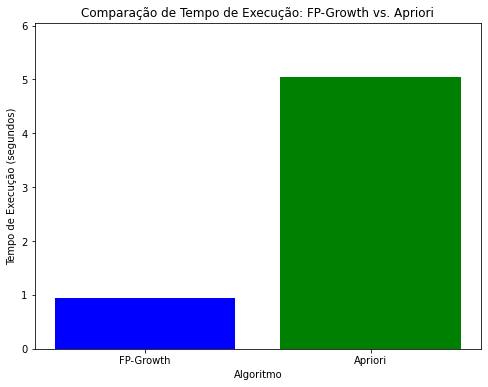

In [36]:



algoritmos = ['FP-Growth', 'Apriori']

# Tempos de execução correspondentes
tempos = [tempo_execucao, tempo_execucao2]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(algoritmos, tempos, color=['blue', 'green'])
plt.xlabel('Algoritmo')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Comparação de Tempo de Execução: FP-Growth vs. Apriori')
plt.ylim(0, max(tempos) * 1.2)  # Define o limite superior do eixo y
plt.show()


In [37]:

import psutil

cpu_percent_before = psutil.cpu_percent()
memory_percent_before = psutil.virtual_memory().percent

#rodando o apriori


frequent_item_sets = apriori(onehot, use_colnames = True, min_support = 0.00005, max_len = 2)
frequent_item_sets


cpu_percent_after = psutil.cpu_percent()
memory_percent_after = psutil.virtual_memory().percent


print("CPU antes e depois:", cpu_percent_before, cpu_percent_after )
print("RAM antes e depois:", memory_percent_before, memory_percent_after)





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU antes e depois: 34.0 51.0
RAM antes e depois: 65.6 65.6


In [38]:
import psutil

cpu_percent_before2 = psutil.cpu_percent()
memory_percent_before2 = psutil.virtual_memory().percent

#rodando o fp growth

frequent_item_sets2 = fpgrowth(onehot, use_colnames = True, min_support = 0.00005)
frequent_item_sets2

cpu_percent_after2 = psutil.cpu_percent()
memory_percent_after2 = psutil.virtual_memory().percent


print("CPU antes e depois:", cpu_percent_before2, cpu_percent_after2 )
print("RAM antes e depois:", memory_percent_before2, memory_percent_after2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU antes e depois: 50.0 32.9
RAM antes e depois: 65.6 65.5


In [39]:
#produtos_frequentes = frequencia_produtos[frequencia_produtos >= 10].index

# criando uma tabela de transações contendo o id dos produtos dessa vez sem a categoria dos produtos, para obter uma
# base maior para verificar se a diferença de desempenho entre os algoritmos de ass continuam a mesma

frequencia_produtos = itens_pedidos['product_id'].value_counts()


itens_pedidos_frequentes = itens_pedidos[itens_pedidos.isin(frequencia_produtos.index[frequencia_produtos>=10]).values]

itens_pedidos_frequentes['product_id'].value_counts()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
a5e28e21acf7c99188ad33f688f18837     10
964dd0fcba2ca4eff8e31ec74a77d41d     10
9a63d4ef456702710823c21b8cca0332     10
87aff1d9a5e94db6840c5b963a5cef90     10
46292acbc08d49b95138891146f7287b     10
Name: product_id, Length: 1899, dtype: int64

In [40]:


transacoes_produtos = itens_pedidos_frequentes.groupby("order_id").product_id.unique()
transacoes_produtos



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
00042b26cf59d7ce69dfabb4e55b4fd9    [ac6c3623068f30de03045865e4e10089]
00061f2a7bc09da83e415a52dc8a4af1    [d63c1011f49d98b976c352955b1c4bea]
0006ec9db01a64e59a68b2c340bf65a7    [99a4788cb24856965c36a24e339b6058]
0008288aa423d2a3f00fcb17cd7d8719    [368c6c730842d78016ad823897a372db]
000aed2e25dbad2f9ddb70584c5a2ded    [4fa33915031a8cde03dd0d3e8fb27f01]
                                                   ...                
fff90cdcb3b2e6cfb397d05d562fd3fe    [764292b2b0f73f77a0272be03fdd45f3]
fffb9224b6fc7c43ebb0904318b10b5f    [43423cdffde7fda63d0414ed38c11a73]
fffc94f6ce00a00581880bf54a75a037    [4aa6014eceb682077f9dc4bffebc05b0]
fffce4705a9662cd70adb13d4a31832d    [72a30483855e2eafc67aee5dc2560482]
fffe18544ffabc95dfada21779c9644f    [9c422a519119dcad7575db5af1ba540e]
Name: product_id, Length: 43778, dtype: object

In [41]:
print("Número de produtos diferentes : ", itens_pedidos_frequentes['product_id'].nunique())


Número de produtos diferentes :  1899


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Convertendo a base de dados transacoes para uma lista para verificar 
#as quantidades de produtos deiferentes por pedido e quantidade de transações

transacoes_produtos = transacoes_produtos.tolist()

# contando a quantidade de categorias de produto por transação

contagem = [len(transaction) for transaction in transacoes_produtos]
#verificando a medianda de quantidade dee categorias de produtos entre as transações
np.median(contagem)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [43]:
#verificando a quantidade maxima de produtos diferentes entre as transações 
np.max(contagem)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [101]:
# Criação da matriz one hot encoded em que cada coluna possui um produto e cada linha representa uma transação
#Caso o produto esteja presente na transação  é marcado como True e caso não esteja presente é marcado como False.
# A representação one-hot encoded torna mais fácil identificar padrões de associação entre os produtos em transações
# Os algoritmos de associação foram desenvolvidos para trabalhar com os dados nesse formato

transacoes_produtos = transacoes_produtos.tolist()

encoder = TransactionEncoder()

encoder.fit(transacoes_produtos)

onehot1 = encoder.transform(transacoes_produtos)

onehot1 = pd.DataFrame(onehot1, columns = encoder.columns_)

onehot1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,00878d953636afec00d3e85d55a12e7f,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,00faa46f36261af8bbf3a4d37fa4841b,013ee64977aaa6b2b25475095162e0e9,...,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
# Verificando a quantidade de transações por quantidade de categorias de produtos

onehot1.sum(axis=1).value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    43043
2      698
3       34
4        3
dtype: int64

In [74]:

#start_time2 = 0
#start_time2 = time.time()

frequent_item_sets3 = apriori(onehot1, use_colnames = True, min_support = 0.001, max_len = 2)
frequent_item_sets3

#tempo_execucao2 = time.time() - start_time2
#print("Tempo de execução:",tempo_execucao2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.001325,(0152f69b6cf919bcdaf117aa8c43e5a2)
1,0.001028,(036734b5a58d5d4f46b0616ddc047ced)
2,0.001028,(054515fd15bc1a2029f10de97ffa9120)
3,0.001302,(06c6e01186af8b98ee1fc9e01f9471e9)
4,0.002970,(06edb72f1e0c64b14c5b79353f7abea3)
...,...,...
183,0.001873,(fb55982be901439613a95940feefd9ee)
184,0.001256,(fbc1488c1a1e72ba175f53ab29a248e8)
185,0.001302,(fbce4c4cb307679d89a3bf3d3bb353b9)
186,0.001233,(fc1d8637c0268af3db482c14b7ef8e75)


In [75]:

start_time3 = 0
start_time3 = time.time()

frequent_item_sets3 = apriori(onehot1, use_colnames = True, min_support = 0.001, max_len = 2)
frequent_item_sets3

tempo_execucao3 = time.time() - start_time3
print("Tempo de execução:",tempo_execucao3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tempo de execução: 198.6973648071289


In [103]:
start_time4 = 0
start_time4 = time.time()

frequent_item_sets4 = fpgrowth(onehot1, use_colnames = True, min_support = 0.001)
frequent_item_sets4

tempo_execucao4 = time.time() - start_time4
print("Tempo de execução:",tempo_execucao4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tempo de execução: 1.2730729579925537


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


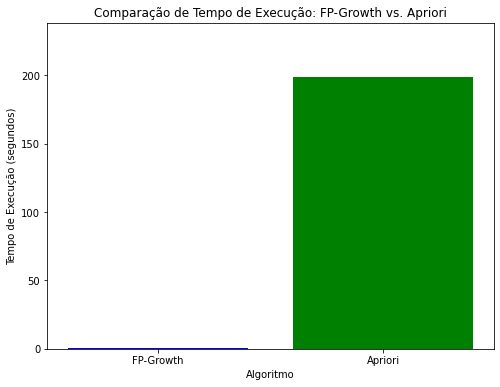

In [128]:
algoritmos2 = ['FP-Growth', 'Apriori']

# Tempos de execução correspondentes
tempos2 = [tempo_execucao4, tempo_execucao3]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(algoritmos2, tempos2, color=['blue', 'green'])
plt.xlabel('Algoritmo')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Comparação de Tempo de Execução: FP-Growth vs. Apriori')
plt.ylim(0, max(tempos2) * 1.2)  # Defina o limite superior do eixo y
plt.show()

In [42]:
pagamentos.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [43]:
clientes.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [44]:
pedidos.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [33]:
clientes = pd.merge(clientes, pedidos[['customer_id','order_id']], on = 'customer_id', how='left')

#clientes.drop("order_id_y", axis=1, inplace=True)
#clientes.rename(columns={"order_id_x": "order_id"}, inplace=True)

clientes.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f


In [34]:
clientes = pd.merge(clientes, pagamentos[['order_id','payment_value']], on = 'order_id', how='left')

clientes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25
...,...,...,...,...,...,...,...
103882,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,88.78
103883,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,129.06
103884,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,56.04
103885,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,711.07


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


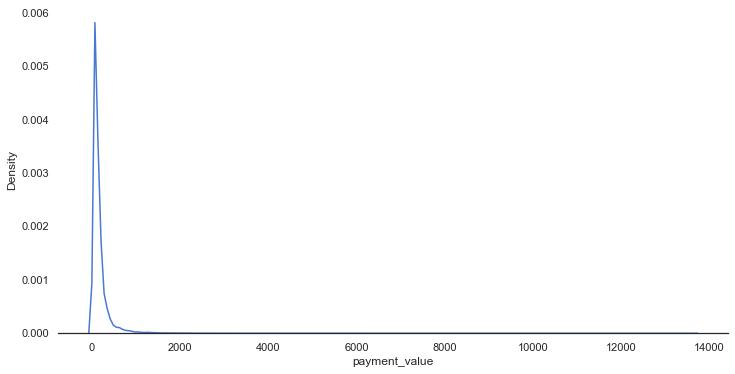

In [35]:
import seaborn as sns
sns.set(style="ticks")

receita_cliente = clientes.groupby('customer_unique_id').payment_value.sum().reset_index()

#receita_cliente.payment_value_x.max()

sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(receita_cliente['payment_value'], hist=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: T

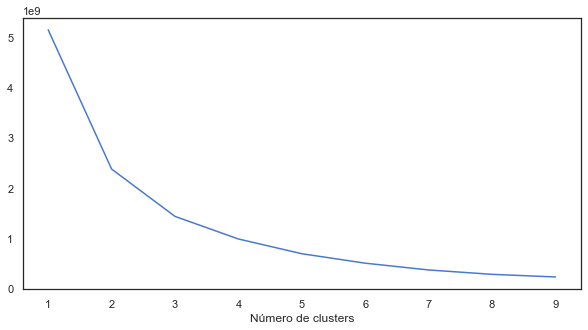

In [36]:
# código para definir o número de clusters através da métrica da soma do quadrado dos erros

from sklearn.cluster import KMeans

sse={}
receita_cliente2 = receita_cliente[['payment_value']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(receita_cliente2)
    receita_cliente2["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.show()


In [37]:
#aplicando o kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(receita_cliente[['payment_value']])
receita_cliente['RevenueCluster'] = kmeans.predict(receita_cliente[['payment_value']])



def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#order the cluster numbers
receita_cliente = order_cluster('RevenueCluster', 'payment_value',receita_cliente,True)

#show details of the dataframe
#df_user.groupby('RevenueCluster')['payment_value'].describe()
receita_cliente.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,customer_unique_id,payment_value,RevenueCluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0
2,0000f46a3911fa3c0805444483337064,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0
4,0004bd2a26a76fe21f786e4fbd80607f,166.98,0


In [38]:
receita_cliente3= receita_cliente.groupby('RevenueCluster')['payment_value']
receita_cliente3.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,68543.0,85.229269,39.562299,0.00,52.2600,79.130,116.2400,167.79
1,21980.0,249.757536,69.166054,167.80,193.3900,227.975,295.0000,433.14
2,4227.0,616.109749,137.568007,433.28,497.5650,594.550,711.9700,939.11
3,1070.0,1263.859710,241.581128,939.61,1048.9075,1224.080,1424.3375,1853.75
4,268.0,2447.696157,624.771947,1859.10,2027.5525,2196.400,2713.3600,4809.44
5,8.0,8090.416250,2471.190122,6081.54,6873.3225,7102.095,8066.9775,13664.08


In [39]:
soma_total = receita_cliente['payment_value'].sum()
soma_total

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16008872.12

In [40]:
clusters_selecionados = [3, 4, 5]
soma_clusters_3_4_5 = receita_cliente[receita_cliente['RevenueCluster'].isin(clusters_selecionados)]['payment_value'].sum()
soma_clusters_3_4_5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2073035.79

In [41]:
receita_cliente = pd.merge(receita_cliente, clientes[['customer_unique_id','customer_id']], on = 'customer_unique_id', how='left')

receita_cliente.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_unique_id,payment_value,RevenueCluster,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0,fadbb3709178fc513abc1b2670aa1ad2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0,4cb282e167ae9234755102258dd52ee8
2,0000f46a3911fa3c0805444483337064,86.22,0,9b3932a6253894a02c1df9d19004239f
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0,914991f0c02ef0843c0e7010c819d642
4,0004bd2a26a76fe21f786e4fbd80607f,166.98,0,4a913a170c26e3c8052ed0202849b5a8


In [42]:
receita_cliente = pd.merge(receita_cliente, pedidos[['customer_id','order_id']], on = 'customer_id', how='left')

receita_cliente.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_unique_id,payment_value,RevenueCluster,customer_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0,fadbb3709178fc513abc1b2670aa1ad2,e22acc9c116caa3f2b7121bbb380d08e
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0,4cb282e167ae9234755102258dd52ee8,3594e05a005ac4d06a72673270ef9ec9
2,0000f46a3911fa3c0805444483337064,86.22,0,9b3932a6253894a02c1df9d19004239f,b33ec3b699337181488304f362a6b734
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0,914991f0c02ef0843c0e7010c819d642,41272756ecddd9a9ed0180413cc22fb6
4,0004bd2a26a76fe21f786e4fbd80607f,166.98,0,4a913a170c26e3c8052ed0202849b5a8,3e470077b690ea3e3d501cffb5e0c499


In [43]:
itens_pedidos = pd.merge(itens_pedidos, receita_cliente[['order_id','RevenueCluster']], on = 'order_id', how='left')

itens_pedidos.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,RevenueCluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,1


In [44]:
itens_pedidos

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,RevenueCluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,1
...,...,...,...,...,...,...,...,...,...
115901,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,1
115902,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,1
115903,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,0
115904,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,0


In [45]:
# Criação das bases de transações para cada cluster

transacoes_cluster_0 = itens_pedidos[itens_pedidos['RevenueCluster'] == 0]

base_cluster_0 = transacoes_cluster_0.groupby("order_id").product_category_name.unique()

base_cluster_0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
00010242fe8c5a6d1ba2dd792cb16214                [cool_stuff]
00024acbcdf0a6daa1e931b038114c75                [perfumaria]
00048cc3ae777c65dbb7d2a0634bc1ea     [utilidades_domesticas]
00054e8431b9d7675808bcb819fb4a32                 [telefonia]
0005a1a1728c9d785b8e2b08b904576c              [beleza_saude]
                                              ...           
fffb2ef8874127f75b52b643880fd7e0           [cama_mesa_banho]
fffbee3b5462987e66fb49b1c5411df2           [casa_construcao]
fffce4705a9662cd70adb13d4a31832d             [esporte_lazer]
fffe18544ffabc95dfada21779c9644f    [informatica_acessorios]
fffe41c64501cc87c801fd61db3f6244           [cama_mesa_banho]
Name: product_category_name, Length: 67980, dtype: object

In [46]:
transacoes_cluster_1 = itens_pedidos[itens_pedidos['RevenueCluster'] == 1]

base_cluster_1 = transacoes_cluster_1.groupby("order_id").product_category_name.unique()

base_cluster_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
00018f77f2f0320c557190d7a144bdd3                  [pet_shop]
000229ec398224ef6ca0657da4fc703e          [moveis_decoracao]
00042b26cf59d7ce69dfabb4e55b4fd9        [ferramentas_jardim]
00119ff934e539cf26f92b9ef0cdfed8             [esporte_lazer]
0011d82c4b53e22e84023405fb467e57          [malas_acessorios]
                                              ...           
fff6b8ca971f8e3ec822e99d0f2d3d21                 [telefonia]
fffa82886406ccf10c7b4e35c4ff2788             [esporte_lazer]
fffb9224b6fc7c43ebb0904318b10b5f        [relogios_presentes]
fffc94f6ce00a00581880bf54a75a037     [utilidades_domesticas]
fffcd46ef2263f404302a634eb57f7eb    [informatica_acessorios]
Name: product_category_name, Length: 23139, dtype: object

In [47]:
transacoes_cluster_2 = itens_pedidos[itens_pedidos['RevenueCluster'] == 2]

base_cluster_2 = transacoes_cluster_2.groupby("order_id").product_category_name.unique()

base_cluster_2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
000576fe39319847cbb9d288c5617fa6        [ferramentas_jardim]
0009c9a17f916a706d71784483a5d643            [consoles_games]
0029c5db35ef291ce99d1262012e7daa              [beleza_saude]
006127b8b9a1681a982313ed7129c3c0        [relogios_presentes]
0068468c453d28c8ef3fd089e50a5847               [eletronicos]
                                              ...           
ffc2638415f3ce34e88641eef792c1fc                [cool_stuff]
ffc49b9c9d666410e9ecdb0a3efadb9c              [beleza_saude]
ffd5e80bfdaf69504efd7562a3d522dd             [esporte_lazer]
fff7c4452f050315db1b3f24d9df5fcd        [relogios_presentes]
fff8287bbae429a99bb7e8c21d151c41    [informatica_acessorios]
Name: product_category_name, Length: 4700, dtype: object

In [48]:
transacoes_cluster_3 = itens_pedidos[itens_pedidos['RevenueCluster'] == 3]

base_cluster_3 = transacoes_cluster_3.groupby("order_id").product_category_name.unique()

base_cluster_3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
0017afd5076e074a48f1f1a4c7bac9c5    [informatica_acessorios]
00c9474e0334f7a4ffc8c3a8bd21a51e           [cama_mesa_banho]
00c9d0257381c7e9ec13b4505f25b2cf                [automotivo]
01a0013ddc7cd129e350e8671b56a263        [ferramentas_jardim]
02014f2495eef0e869616829d481d743              [beleza_saude]
                                              ...           
fee72a68ce935ebf2939fe72f27d3d9b                [automotivo]
ff098b9342213641be5da8163f0fcf2c                       [pcs]
ff2d25d8b1b734099dee10e90e23a2ab              [beleza_saude]
ff4935343715e7a6dae3e550f73a6459    [informatica_acessorios]
ff89ef7b3952bba5ac06d61c4a79ffbe           [cama_mesa_banho]
Name: product_category_name, Length: 1176, dtype: object

In [49]:
transacoes_cluster_4 = itens_pedidos[itens_pedidos['RevenueCluster'] == 4]

base_cluster_4 = transacoes_cluster_4.groupby("order_id").product_category_name.unique()

base_cluster_4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
012f2c4ca09b101a73e18957c3294cd6                    [ferramentas_jardim]
028558cddca332b40b4ac4cb77407edf                [informatica_acessorios]
03a312126d4985217afef2625df60af4                 [instrumentos_musicais]
03aba68b07658f28f29612641f08d4ba                             [telefonia]
03b31f549c27d03bed25fc42ddb46138           [portateis_casa_forno_e_cafe]
                                                    ...                 
fa752aebeda0a3f9a2626bc507550c3f    [construcao_ferramentas_ferramentas]
fb441bffe443e71cb16477c4743591e8                         [esporte_lazer]
fbc8e8d5591dc594ede3b88033625bd0                            [automotivo]
fe579bd413f722e51bc98182441e135c                              [pet_shop]
fe8019fe8dd1f1af8ba5c0ffdb113a74                    [eletrodomesticos_2]
Name: product_category_name, Length: 273, dtype: object

In [50]:
transacoes_cluster_5 = itens_pedidos[itens_pedidos['RevenueCluster'] == 5]

base_cluster_5 = transacoes_cluster_5.groupby("order_id").product_category_name.unique()

base_cluster_5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
03caa2c082116e1d31e67e9ae3700499               [telefonia_fixa]
0812eb902a67711a1cb742b3cdaa65ae        [utilidades_domesticas]
2cc9089445046817a7539d90805e6e5a    [agro_industria_e_comercio]
53c71d3953507c6239ff73917ed358c9                   [cool_stuff]
736e1922ae60d0d6a89247b851902527               [telefonia_fixa]
8ea7aebc18842332aad5f41ca74b334c              [eletroportateis]
a96610ab360d42a2e5335a3998b4718a              [eletroportateis]
f5136e38d1a14a4dbd87dff67da82701                        [artes]
fefacc66af859508bf1a7934eab1e97f                          [pcs]
Name: product_category_name, dtype: object

In [51]:
# Passando as bases criadas para lista para poder aplicar a one-hot 

base_cluster_0 = base_cluster_0.tolist()
base_cluster_1 = base_cluster_1.tolist()
base_cluster_2 = base_cluster_2.tolist()
base_cluster_3 = base_cluster_3.tolist()
base_cluster_4 = base_cluster_4.tolist()
base_cluster_5 = base_cluster_5.tolist()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# criando matriz one_hot para base de transações do cluster 0 
encoder = TransactionEncoder()

encoder.fit(base_cluster_0)

onehot_c0 = encoder.transform(base_cluster_0)

onehot_c0 = pd.DataFrame(onehot_c0, columns = encoder.columns_)

onehot_c0.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# criando matriz one_hot para base de transações do cluster 1 
encoder = TransactionEncoder()

encoder.fit(base_cluster_1)

onehot_c1 = encoder.transform(base_cluster_1)

onehot_c1 = pd.DataFrame(onehot_c1, columns = encoder.columns_)

onehot_c1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# criando matriz one_hot para base de transações do cluster 2 
encoder = TransactionEncoder()

encoder.fit(base_cluster_2)

onehot_c2 = encoder.transform(base_cluster_2)

onehot_c2 = pd.DataFrame(onehot_c2, columns = encoder.columns_)

onehot_c2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,...,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# criando matriz one_hot para base de transações do cluster 3 
encoder = TransactionEncoder()

encoder.fit(base_cluster_3)

onehot_c3 = encoder.transform(base_cluster_3)

onehot_c3 = pd.DataFrame(onehot_c3, columns = encoder.columns_)

onehot_c3.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,alimentos,audio,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,casa_construcao,cine_foto,...,perfumaria,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# criando matriz one_hot para base de transações do cluster 4 
encoder = TransactionEncoder()

encoder.fit(base_cluster_4)

onehot_c4 = encoder.transform(base_cluster_4)

onehot_c4 = pd.DataFrame(onehot_c4, columns = encoder.columns_)

onehot_c4.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,automotivo,bebes,bebidas,beleza_saude,cama_mesa_banho,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_seguranca,...,moveis_escritorio,moveis_sala,pcs,pet_shop,portateis_casa_forno_e_cafe,relogios_presentes,sinalizacao_e_seguranca,telefonia,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [57]:
# criando matriz one_hot para base de transações do cluster 5 
encoder = TransactionEncoder()

encoder.fit(base_cluster_5)

onehot_c5 = encoder.transform(base_cluster_5)

onehot_c5 = pd.DataFrame(onehot_c5, columns = encoder.columns_)

onehot_c5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,agro_industria_e_comercio,artes,cool_stuff,eletroportateis,pcs,telefonia_fixa,utilidades_domesticas
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False


In [58]:
# aplicando APRIORI para a  base de transações cluster 0 
frequent_item_sets_c0 = apriori(onehot_c0, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.000986,(agro_industria_e_comercio)
1,0.005811,(alimentos)
2,0.002824,(alimentos_bebidas)
3,0.002736,(artes)
4,0.000294,(artes_e_artesanato)
...,...,...
79,0.000235,"(moveis_decoracao, cama_mesa_banho)"
80,0.000118,"(utilidades_domesticas, cama_mesa_banho)"
81,0.000103,"(utilidades_domesticas, esporte_lazer)"
82,0.000074,"(informatica_acessorios, telefonia)"


In [59]:
# aplicando APRIORI para a  base de transações cluster 1 
frequent_item_sets_c1 = apriori(onehot_c1, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.001469,(agro_industria_e_comercio)
1,0.002031,(alimentos)
2,0.001297,(alimentos_bebidas)
3,0.000648,(artes)
4,0.000086,(artes_e_artesanato)
...,...,...
121,0.000086,"(pet_shop, moveis_decoracao)"
122,0.000216,"(relogios_presentes, moveis_decoracao)"
123,0.000562,"(utilidades_domesticas, moveis_decoracao)"
124,0.000130,"(moveis_escritorio, moveis_sala)"


In [60]:
# aplicando APRIORI para a  base de transações cluster 2 
frequent_item_sets_c2 = apriori(onehot_c2, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.012979,(agro_industria_e_comercio)
1,0.001277,(alimentos)
2,0.001064,(alimentos_bebidas)
3,0.000213,(artes_e_artesanato)
4,0.000213,(artigos_de_festas)
...,...,...
115,0.000213,"(moveis_quarto, moveis_decoracao)"
116,0.000638,"(moveis_decoracao, moveis_sala)"
117,0.000213,"(moveis_decoracao, perfumaria)"
118,0.000426,"(utilidades_domesticas, moveis_decoracao)"


In [61]:
# aplicando APRIORI para a  base de transações cluster 3 
frequent_item_sets_c3 = apriori(onehot_c3, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.011905,(agro_industria_e_comercio)
1,0.001701,(alimentos)
2,0.001701,(audio)
3,0.047619,(automotivo)
4,0.051871,(bebes)
...,...,...
62,0.000850,"(telefonia, eletronicos)"
63,0.000850,"(utilidades_domesticas, eletroportateis)"
64,0.000850,"(relogios_presentes, esporte_lazer)"
65,0.000850,"(ferramentas_jardim, moveis_decoracao)"


In [62]:
# aplicando APRIORI para a  base de transações cluster 4 
frequent_item_sets_c4 = apriori(onehot_c4, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.018315,(agro_industria_e_comercio)
1,0.091575,(automotivo)
2,0.043956,(bebes)
3,0.003663,(bebidas)
4,0.040293,(beleza_saude)
5,0.021978,(cama_mesa_banho)
6,0.014652,(consoles_games)
7,0.029304,(construcao_ferramentas_construcao)
8,0.007326,(construcao_ferramentas_ferramentas)
9,0.010989,(construcao_ferramentas_seguranca)


In [63]:
# aplicando APRIORI para a  base de transações cluster 5 
frequent_item_sets_c5 = apriori(onehot_c5, use_colnames = True, min_support = 0.00005, max_len = 2)

frequent_item_sets_c5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.111111,(agro_industria_e_comercio)
1,0.111111,(artes)
2,0.111111,(cool_stuff)
3,0.222222,(eletroportateis)
4,0.111111,(pcs)
5,0.222222,(telefonia_fixa)
6,0.111111,(utilidades_domesticas)


In [64]:
# aplicando a regra de associação para obter os padrões de compra do cluster 0

associacoes_c0 = association_rules(frequent_item_sets_c0, metric = 'confidence', min_threshold = 0.003)
associacoes_c0

#associacoes_c0 = associacoes_c0[associacoes_c0['leverage'] > 0.00]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brinquedos),(bebes),0.042218,0.029773,0.000147,0.003484,0.117028,-0.001110,0.973619,-0.887356
1,(bebes),(brinquedos),0.029773,0.042218,0.000147,0.004941,0.117028,-0.001110,0.962537,-0.886060
2,(bebes),(cama_mesa_banho),0.029773,0.099441,0.000118,0.003953,0.039748,-0.002843,0.904133,-0.961390
3,(moveis_decoracao),(cama_mesa_banho),0.065666,0.099441,0.000235,0.003584,0.036044,-0.006295,0.903798,-0.966243


In [65]:
# aplicando a regra de associação para obter os padrões de compra do cluster 1

associacoes_c1 = association_rules(frequent_item_sets_c1, metric = 'confidence', min_threshold = 0.1)

associacoes_c1 = associacoes_c1[associacoes_c1['leverage'] > 0.00]

associacoes_c1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(artes),(moveis_decoracao),0.000648,0.074679,0.000173,0.266667,3.570833,0.000124,1.261801,0.720420
1,(casa_conforto),(cama_mesa_banho),0.007520,0.098924,0.001556,0.206897,2.091472,0.000812,1.136139,0.525822
2,(tablets_impressao_imagem),(cool_stuff),0.000346,0.050521,0.000086,0.250000,4.948460,0.000069,1.265972,0.798193


In [73]:
# aplicando a regra de associação para obter os padrões de compra do cluster 2

associacoes_c2 = association_rules(frequent_item_sets_c2, metric = 'confidence', min_threshold = 0.19)

associacoes_c2 = associacoes_c2[associacoes_c2['leverage'] > 0.00]

associacoes_c2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(alimentos_bebidas),(esporte_lazer),0.001064,0.060851,0.000213,0.200000,3.286713,0.000148,1.173936,0.696486
1,(bebidas),(beleza_saude),0.001489,0.103191,0.000426,0.285714,2.768778,0.000272,1.255532,0.639783
2,(casa_conforto),(cama_mesa_banho),0.004255,0.069787,0.001277,0.300000,4.298780,0.000980,1.328875,0.770655


In [76]:
# aplicando a regra de associação para obter os padrões de compra do cluster 3

associacoes_c3 = association_rules(frequent_item_sets_c3, metric = 'confidence', min_threshold = 0.1)

associacoes_c3 = associacoes_c3[associacoes_c3['leverage'] > 0.00]

associacoes_c3 = associacoes_c3[associacoes_c3['consequent support'] > 0.05]

associacoes_c3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(audio),(relogios_presentes),0.001701,0.116497,0.00085,0.500000,4.291971,0.000652,1.767007,0.768313
7,(construcao_ferramentas_iluminacao),(esporte_lazer),0.005952,0.068027,0.00085,0.142857,2.100000,0.000445,1.087302,0.526946
9,(eletronicos),(informatica_acessorios),0.004252,0.080782,0.00085,0.200000,2.475789,0.000507,1.149022,0.598634


In [68]:
# aplicando a regra de associação para obter os padrões de compra do cluster 4

associacoes_c4 = association_rules(frequent_item_sets_c4, metric = 'confidence', min_threshold = 0.1)

associacoes_c4 = associacoes_c4[associacoes_c4['leverage'] > 0.00]

associacoes_c4



#associacoes_c4 = associacoes_c4[associacoes_c4['consequent support'] > 0.05]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(utilidades_domesticas),(cama_mesa_banho),0.021978,0.021978,0.003663,0.166667,7.583333,0.00318,1.173626,0.88764
1,(cama_mesa_banho),(utilidades_domesticas),0.021978,0.021978,0.003663,0.166667,7.583333,0.00318,1.173626,0.88764


In [69]:
# aplicando a regra de associação para obter os padrões de compra do cluster 5

associacoes_c5 = association_rules(frequent_item_sets_c5, metric = 'confidence', min_threshold = 0.000001)

#associacoes_c5 = associacoes_c5[associacoes_c5['leverage'] > 0.00]

#associacoes_c5 = associacoes_c5[associacoes_c5['consequent support'] > 0.05]

associacoes_c5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
